In [1]:
#https://www.kaggle.com/amitkumarjaiswal/beginner-s-eda-for-crypto-market
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#figsize에 대한 고정
sns.set(rc={'figure.figsize':(12,6)})
#분수 출력에 대한 포맷 고정
pd.options.display.float_format="{:.3f}".format

In [3]:
#Close Ratio = (Close-Low)/(High-Low)   volume->거래량..
#Spread is the $USD difference between the high and low values for the day.
data=pd.read_csv("crypto-markets.csv")
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300,135.980,132.100,134.210,0.000,1488566728.000,0.544,3.880
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440,147.490,134.000,144.540,0.000,1603768865.000,0.781,13.490
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000,146.930,134.050,139.000,0.000,1542813125.000,0.384,12.880
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000,139.890,107.720,116.990,0.000,1298954594.000,0.288,32.170
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380,125.600,92.280,105.210,0.000,1168517495.000,0.388,33.320


In [4]:
print(data.shape)
data.describe()

(942297, 13)


,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000,942297.000,942297.000,942297.000,942297.000,942297.000,942297.000,942297.000,942297.000
mean,1000.171,348.352,408.593,296.253,346.102,8720383.288,172505976.165,0.459,112.340
std,587.575,13184.358,16163.859,10929.313,13098.223,183980157.984,3575589517.511,0.326,6783.713
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000
25%,465.000,0.002,0.003,0.002,0.002,175.000,29581.000,0.163,0.000
50%,1072.000,0.024,0.027,0.021,0.024,4278.000,522796.000,0.432,0.000
75%,1484.000,0.227,0.251,0.204,0.226,119090.000,6874647.000,0.746,0.030
max,2072.000,2298390.000,2926100.000,2030590.000,2300740.000,23840899072.000,326502485530.000,1.000,1770563.000


In [9]:
data.isnull().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

In [5]:
#값이 너무 큰 market과 volume열을 billion단위로 수정
data[['market','volume']].apply(lambda x: x/1000000000)
#참고 : pd.date_range('년-월-일(start)', '년-월-일(end)',freq='D').to_series()
data['date']=pd.to_datetime(data['date'])
data.sample(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
835377,bitquark,BTQ,BitQuark,2016-07-04,1692,0.000,0.000,0.000,0.000,1.000,1052.000,1.000,0.000
137294,sonm,SNM,SONM,2017-11-25,247,0.094,0.106,0.094,0.105,1218370.000,37796837.000,0.898,0.010
222946,travala,AVA,Travala,2018-08-01,436,0.074,0.089,0.071,0.089,8437.000,2510800.000,1.000,0.020
621157,surety,SURE,SURETY,2018-11-01,1376,0.006,0.008,0.005,0.008,3952.000,254190.000,1.000,0.000
509047,anoncoin,ANC,Anoncoin,2017-07-20,1202,1.220,1.480,1.220,1.450,528384.000,3059622.000,0.885,0.260


Text(0.5,1,'Top 10 Currencies by Market Cap')

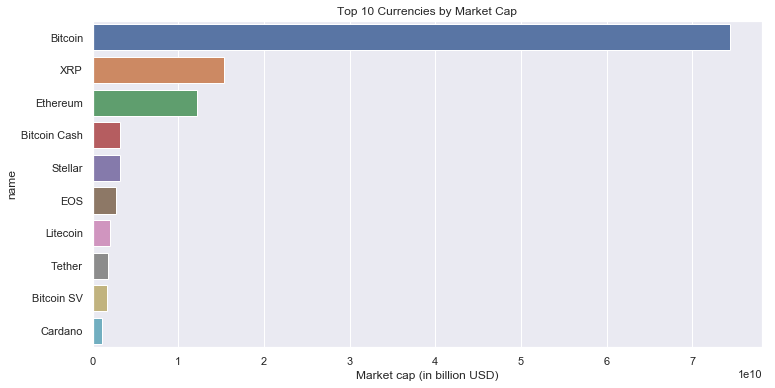

In [4]:
market10 = data.groupby(['name'])['name','market'].last().sort_values(by='market',ascending=False).head(10)
sns.barplot(x='market',y='name',data=market10)
plt.xlabel("Market cap (in billion USD)")
plt.title("Top 10 Currencies by Market Cap")

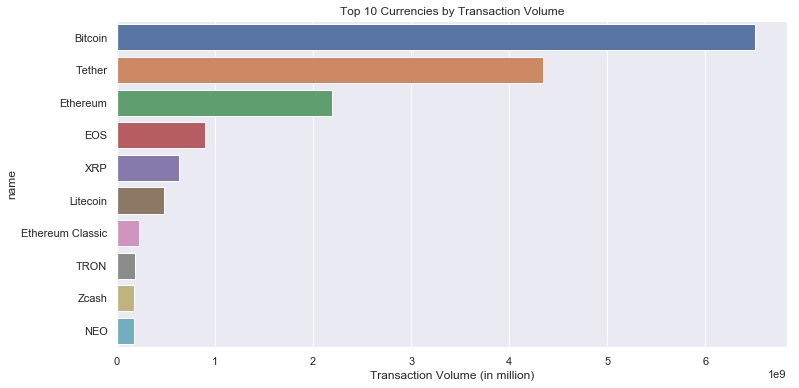

In [112]:
#drop_duplicates->중복된 data drop함
volume10=data[['name','volume']].drop_duplicates(['name'],keep='last').sort_values(by='volume',ascending=False).head(10)
sns.barplot(x='volume',y='name',data=volume10)
plt.xlabel("Transaction Volume (in million)")
plt.title("Top 10 Currencies by Transaction Volume")

Text(0.5, 1.0, 'Price per unit of currency')

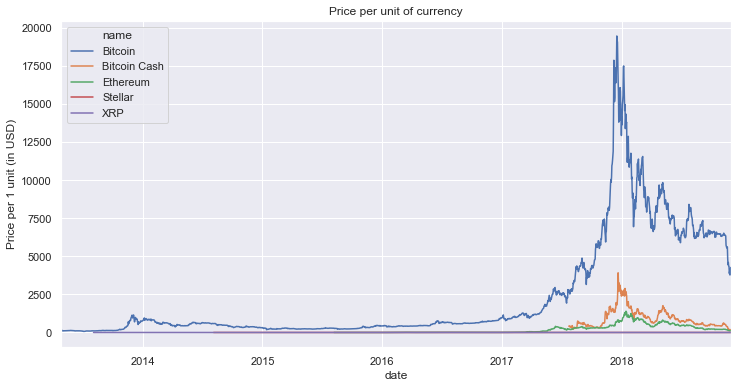

In [11]:
#groupby.last->마지막 데이터 여기서는 각 name에 대한 마지막 데이터는 가장 최근 데이터를 의미
top5_names=data.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
top5_data = data[data['name'].isin(top5_names)]
#unstack->index=a,b인 series를 index=int,column=a,b
ax=top5_data.groupby(['date', 'name'])['close'].mean().unstack().plot()
ax.set_ylabel("Price per 1 unit (in USD)")
plt.title("Price per unit of currency")

Text(0.5,1,'Transaction Volume per Currency')

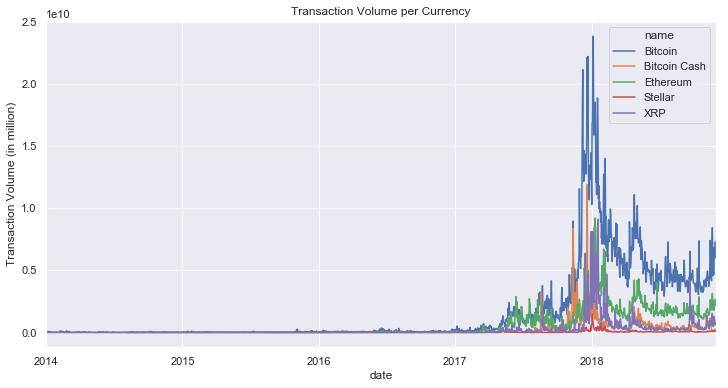

In [25]:
#pd.Series.dt->Series에 시간 데이터가 포함되어 있을때(to_datetime) 시간 범위 조절가능
ax=top5_data[top5_data.date.dt.year>=2014].groupby(['date','name'])['volume'].mean().unstack().plot()
ax.set_ylabel("Transaction Volume (in million)")
plt.title("Transaction Volume per Currency")

Text(0.5,1,'Market cap per Currency (from 2017th)')

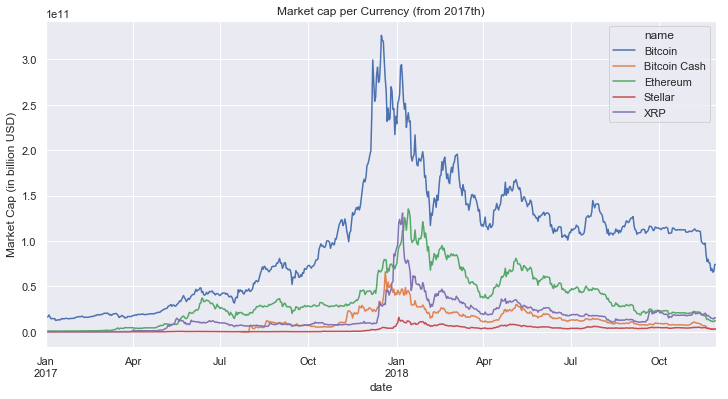

In [28]:
ax=top5_data[top5_data.date.dt.year>=2017].groupby(['date','name'])['market'].mean().unstack().plot()
ax.set_ylabel("Market Cap (in billion USD)")
plt.title("Market cap per Currency (from 2017th)")

Text(0.5,1,'Price per unit of currency (from 2017th)')

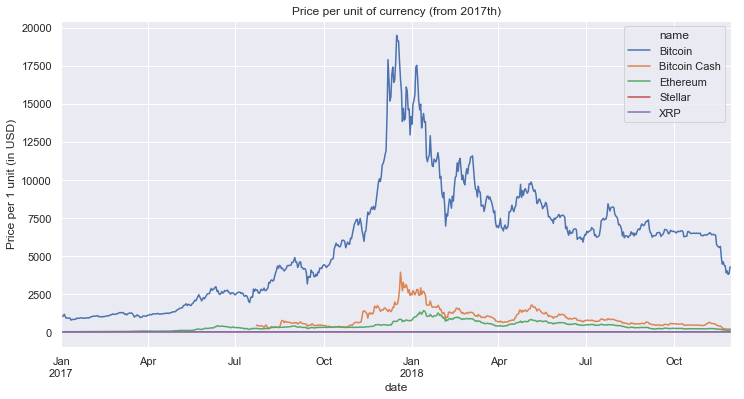

In [29]:
ax=top5_data[top5_data.date.dt.year>=2017].groupby(['date','name'])['close'].mean().unstack().plot()
ax.set_ylabel("Price per 1 unit (in USD)")
plt.title("Price per unit of currency (from 2017th)")

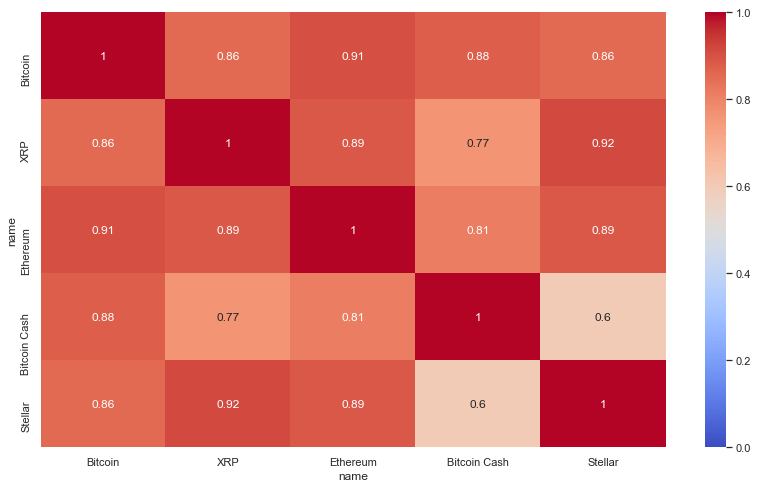

In [12]:
wide_format=data.groupby(['date','name'])['close'].last().unstack()
plt.figure(figsize=(14,8))
#annot->상관관계 정도 수치화해서 표현 (1, 0.86등)  camp->heatmap종류
#vmin, vmax-> 데이터의 상관관계 범위와 상관없이 0~1로 고정
#아래 데이터 상관관계범위는 0.6~1, 이 경우 0.6이 파란색으로 표시되는데 vmin=0으로 줘서 빨간색으로 표현됨
sns.heatmap(wide_format[top5_names].corr(),cmap='coolwarm',vmin=0,vmax=1,annot=True)

In [23]:
#특정 값의 돈을(amount) t시점에 투자했을 때 얻는 수익(ROI)
#df_new.iloc[0]->t시점에 해당 coin 가격
def plot_ROI(amount,t,df):
    df_new=df[(df.index.year>=t)]
    ((amount/df_new.iloc[0])*df_new).plot(figsize=(12,8))

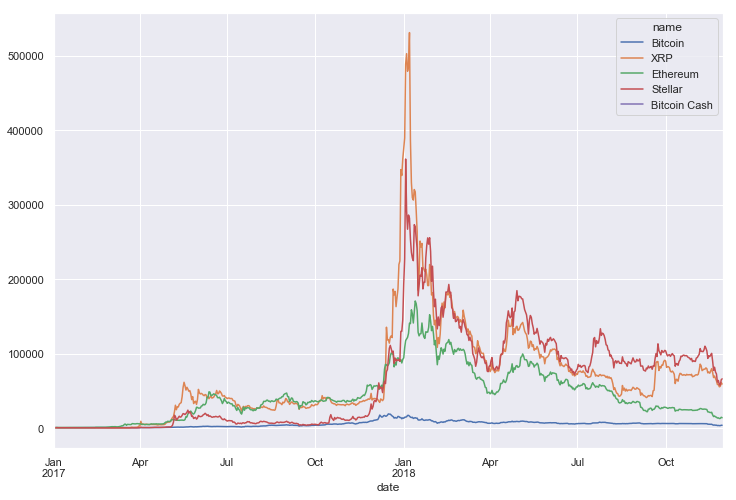

In [38]:
#top5 coin각각에 대해 2017년에 1000달러 투자했을때 ROI
plot_ROI(1000,2017,wide_format[list(top5_data['name'].unique())])

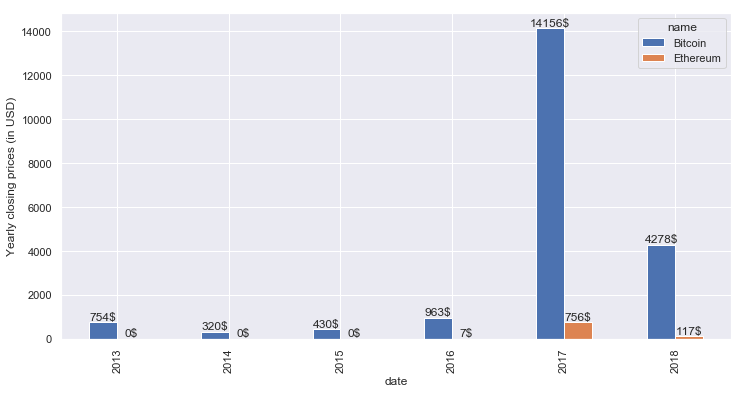

In [53]:
#bitcoin과 eithereum에 대해 매년 마지막 시장가격을 막대그래프로 나타냄
is_bitcoin=data['symbol']=='BTC'
is_ethereum=data['symbol']=='ETH'
is_ripple=data['symbol']=='XRP'

#reset_index->index를 0,1,2...상태로 되돌리고 기존의 index는 한 열로 이동
closing_prices_bit_eith=data[is_bitcoin | is_ethereum].groupby(['date','name'])['close'].last().unstack().reset_index()
yearly_closing_bit_eith=closing_prices_bit_eith.groupby(closing_prices_bit_eith.date.dt.year).last()
yearly_closing_bit_eith_t=yearly_closing_bit_eith.drop(columns='date')

ax=yearly_closing_bit_eith_t.plot(kind='bar')
ax.set_ylabel("Yearly closing prices (in USD)")
#ax.patches->그래프에서 각 형태(선, 박스)에 대한 정보
#x좌표를 박스 중간으로 설정했지만(get_x+width/2) 중간부터 숫자를 입력해서 오른쪽으로 치우침
#ha->중앙정렬(horizontal), va->수직정렬(vertical)
for rect in ax.patches:
    height=rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0,height,'%d$' %int(height),ha='center',va='bottom')

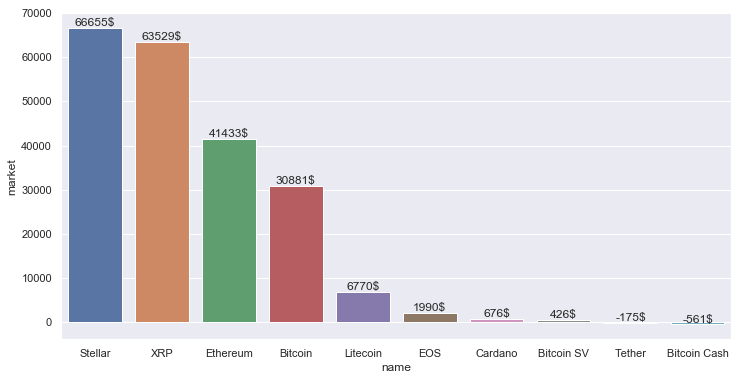

In [73]:
def calc_earnings(name,amount,df):
    closing=df[(df['name']==name)&(~df['close'].isnull())][['date','close']]
    
    num_units_purchased=amount/closing.iloc[0]['close']
    last_price=closing.iloc[-1]['close']
    amount_earned=last_price*num_units_purchased-1000
    
    return amount_earned

amount=1000
market10_earnings=data.groupby('name')['market'].last().sort_values(ascending=False).head(10)

for currency in market10.index:
    market10_earnings[currency]=calc_earnings(currency,1000,data)
market10_earnings=market10_earnings.sort_values(ascending=False).reset_index()
ax=sns.barplot(x='name',y='market',data=market10_earnings)
for rect in ax.patches:
    height=rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,height,'%d$'%int(height),ha='center',va='bottom')

In [30]:
#이전 3일치 close데이터를 이용한 코인 가격 등락 예측(등:1 락:-1)
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
test=data[data['name']=='Bitcoin'].copy()
test['price_diff_d1']=0
test['price_diff_d2']=0
test['price_diff_d3']=0
test['trend']=0

In [17]:
for i, row in test.iterrows():
    current_price=row['close']
    for j in range(1,4):
        if i-j < 0:
            continue
        prev_price=test.iloc[i-j]['close']
        column='price_diff_d'+str(j)
        test.loc[i][column]=(current_price-prev_price)
    if i>0:
        test.loc[i]['trend']=1 if current_price > test.loc[i-1]['close'] else -1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
X=test[['close','price_diff_d1','price_diff_d2','price_diff_d3']]
y=test['trend']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [27]:
#랜덤포레스트 n_estimators->트리의 개수 max_depth->트리의 깊이(None:제한 두지않고 펼침)
#oob(out of bag)->임의 중복추출 시 훈련 데이터 집합에 속하지 않는 데이터
model=RandomForestClassifier(n_estimators=10,max_depth=None,random_state=1234,oob_score=True)
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=1234, verbose=0, warm_start=False)

In [28]:
print("훈련 : {}, 테스트 : {}".format(model.score(X_train,y_train), model.score(X_test,y_test)))

훈련 : 1.0, 테스트 : 1.0


In [35]:
#cross validation 한 데이터 안에서 훈련, 테스트 데이터를 여러번 나눔
#특정 데이터가 훈련데이터일 수도 있고 테스트데이터일 수도 있다.
#데이터의 양이 적을 때 정확도 향상에 도움이 된다.
scores=cross_val_score(model,X,y)
score=scores.mean()
print("cross-validation score: {:.5f}".format(score))

cross-validation score: 0.99902


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid 